In [1]:
from geopy.geocoders import Nominatim
import pandas as pd
import geopandas
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt


In [2]:
address='Mykolaiv, Mykolaiv'
geolocator = Nominatim(user_agent="Your_Name")
location = geolocator.geocode(address)
print(location.address)
print((location.latitude, location.longitude))

Миколаїв, Миколаївський район, Миколаївська область, Україна
(46.932879549999996, 32.00211658147113)


In [3]:
data = pd.read_csv('2013_Events.csv')

In [4]:
data.head()

,ID,Event start date,One day?,Event end date,Day of the week,Action type,Action,Actor-structure,Actor-form,Actor-ideology,...,Public transportation,Number of protesters,Number of civilians arrested,Number of civilians injured,Number of civilians killed,Property damage,State forces involved in the conflict,Number of state forces injured,Number of state forces killed,Dubious event
0,CK13010101,2013-01-01,1,2013-01-01,Tue,protest,demonstration/march,NaN,"party, NGO",rightists,...,NaN,31.0,0.0,0.0,0,N,NaN,0.0,0,N
1,CK13011601,2013-01-16,1,2013-01-16,Wed,protest,rally,neighborhood,NaN,NaN,...,NaN,NaN,0.0,0.0,0,N,NaN,0.0,0,N
2,CK13012101,2013-01-21,1,2013-01-21,Mon,protest,symbolic,NaN,party,NaN,...,NaN,4.0,0.0,0.0,0,N,NaN,0.0,0,N
3,CK13012201,2013-01-22,1,2013-01-22,Tue,protest,rally,NaN,party,rightists,...,NaN,499.0,0.0,0.0,0,N,NaN,0.0,0,N
4,CK13012901,2013-01-29,1,2013-01-29,Tue,protest,demonstration/march,NaN,party,rightists,...,NaN,299.0,0.0,0.0,0,N,NaN,0.0,0,N


In [5]:
for col in data.columns:
    print(col)

ID
Event start date
One day?
Event end date
Day of the week
Action type
Action
Actor-structure
Actor-form
Actor-ideology
Actor specified
Target addressee
Target criticized
Target-structure
Target-form
Target-ideology
Target specified
Event
Event series
Pavlichenko
Oblast
Location
Time
Issue 1
Issue 2
Issue 3
Public transportation
Number of protesters
Number of civilians arrested
Number of civilians injured
Number of civilians killed
Property damage
State forces involved in the conflict
Number of state forces injured
Number of state forces killed
Dubious event


In [6]:
data_clean = data[['Event start date', 'One day?', 'Event end date', 'Oblast', 'Location', 'Time', 'Number of protesters']]

In [7]:
data_clean.head()

,Event start date,One day?,Event end date,Oblast,Location,Time,Number of protesters
0,2013-01-01,1,2013-01-01,Cherkasy,Mankivka village,NaN,31.0
1,2013-01-16,1,2013-01-16,Cherkasy,Cherkasy,NaN,NaN
2,2013-01-21,1,2013-01-21,Cherkasy,Cherkasy,NaN,4.0
3,2013-01-22,1,2013-01-22,Cherkasy,Cherkasy,NaN,499.0
4,2013-01-29,1,2013-01-29,Cherkasy,Cherkasy,NaN,299.0


In [8]:
result = [x + ', ' + y for x, y in zip(data_clean['Oblast'], data_clean['Location'])]
data_clean.insert(5, 'Location String', result)

In [9]:
data_clean.head()

,Event start date,One day?,Event end date,Oblast,Location,Location String,Time,Number of protesters
0,2013-01-01,1,2013-01-01,Cherkasy,Mankivka village,"Cherkasy, Mankivka village",NaN,31.0
1,2013-01-16,1,2013-01-16,Cherkasy,Cherkasy,"Cherkasy, Cherkasy",NaN,NaN
2,2013-01-21,1,2013-01-21,Cherkasy,Cherkasy,"Cherkasy, Cherkasy",NaN,4.0
3,2013-01-22,1,2013-01-22,Cherkasy,Cherkasy,"Cherkasy, Cherkasy",NaN,499.0
4,2013-01-29,1,2013-01-29,Cherkasy,Cherkasy,"Cherkasy, Cherkasy",NaN,299.0


In [ ]:
coord_dict = {}

In [12]:
def get_coords(name):
    print('Getting coords for: ' + name)
    if name in coord_dict:
        #print(name + ' is in the dict')
        return coord_dict[name]
    else:
        coords = geolocator.geocode(name)
        if coords:
            coord_dict[name] = Point([coords.longitude, coords.latitude])
            return coord_dict[name]
        else:
            return None


In [11]:
%store -r coord_dict

In [13]:
#result = [coord_dict.setdefault(x, geolocator.geocode(x)) for x in data_clean['Location String']]
result2 = [get_coords(x) for x in data_clean['Location String']]


Getting coords for: Cherkasy, Mankivka village
Getting coords for: Cherkasy, Cherkasy
Getting coords for: Cherkasy, Cherkasy
Getting coords for: Cherkasy, Cherkasy
Getting coords for: Cherkasy, Cherkasy
Getting coords for: Cherkasy, Cherkasy
Getting coords for: Cherkasy, Cherkasy
Getting coords for: Cherkasy, Cherkasy
Getting coords for: Cherkasy, Cherkasy
Getting coords for: Cherkasy, Uman
Getting coords for: Cherkasy, Cherkasy
Getting coords for: Cherkasy, Cherkasy
Getting coords for: Cherkasy, Cherkasy
Getting coords for: Cherkasy, Cherkasy
Getting coords for: Cherkasy, Uman
Getting coords for: Cherkasy, Uman
Getting coords for: Cherkasy, Cherkasy
Getting coords for: Cherkasy, Cherkasy
Getting coords for: Cherkasy, Uman
Getting coords for: Cherkasy, Cherkasy
Getting coords for: Cherkasy, Cherkasy
Getting coords for: Cherkasy, Cherkasy
Getting coords for: Cherkasy, Uman
Getting coords for: Cherkasy, Uman
Getting coords for: Cherkasy, Cherkasy
Getting coords for: Cherkasy, Cherkasy
Ge

Getting coords for: Chernihiv, Chernihiv
Getting coords for: Chernihiv, Chernihiv
Getting coords for: Chernihiv, Chernihiv
Getting coords for: Chernihiv, Chernihiv
Getting coords for: Chernihiv, Lemeshi village
Getting coords for: Chernihiv, Lemeshi village
Getting coords for: Chernihiv, Chernihiv
Getting coords for: Chernihiv, Chernihiv
Getting coords for: Chernihiv, Chernihiv
Getting coords for: Chernihiv, Chernihiv
Getting coords for: Chernihiv, Chernihiv
Getting coords for: Chernihiv, Chernihiv
Getting coords for: Chernihiv, Chernihiv
Getting coords for: Chernihiv, Chernihiv
Getting coords for: Chernihiv, Chernihiv
Getting coords for: Chernihiv, Chernihiv
Getting coords for: Chernihiv, Chernihiv
Getting coords for: Chernihiv, Chernihiv
Getting coords for: Chernihiv, Chernihiv
Getting coords for: Chernihiv, Chernihiv
Getting coords for: Chernihiv, Chernihiv
Getting coords for: Chernihiv, Chernihiv
Getting coords for: Chernihiv, Nizhyn
Getting coords for: Chernihiv, Chernihiv
Getting

Getting coords for: Crimea, Simferopol
Getting coords for: Crimea, Sevastopol
Getting coords for: Crimea, Partenit urban settlement
Getting coords for: Crimea, Partenit urban settlement
Getting coords for: Crimea, Sevastopol
Getting coords for: Crimea, Sevastopol
Getting coords for: Crimea, Sevastopol
Getting coords for: Crimea, Sevastopol
Getting coords for: Crimea, Sevastopol
Getting coords for: Crimea, Sevastopol
Getting coords for: Crimea, Feodosia
Getting coords for: Crimea, Sevastopol
Getting coords for: Crimea, Simferopol
Getting coords for: Crimea, Alushta
Getting coords for: Crimea, Simferopol
Getting coords for: Crimea, Simferopol
Getting coords for: Crimea, Sevastopol
Getting coords for: Crimea, Kirovske urban settlement
Getting coords for: Crimea, Kerch
Getting coords for: Crimea, Kerch
Getting coords for: Crimea, Bilohirsk District
Getting coords for: Crimea, Prymorskyi urban settlement
Getting coords for: Crimea, Strohanivka village
Getting coords for: Crimea, Simferopol


Getting coords for: Chernivtsi, Mamaivtsi village
Getting coords for: Chernivtsi, Chernivtsi
Getting coords for: Chernivtsi, Hlyboka urban settlement
Getting coords for: Chernivtsi, Chernivtsi
Getting coords for: Chernivtsi, Hlyboka urban settlement
Getting coords for: Chernivtsi, Hlyboka urban settlement
Getting coords for: Chernivtsi, Novodnistrovsk
Getting coords for: Chernivtsi, Novodnistrovsk
Getting coords for: Chernivtsi, Novodnistrovsk
Getting coords for: Chernivtsi, Novodnistrovsk
Getting coords for: Chernivtsi, Chernivtsi
Getting coords for: Chernivtsi, Zadubrivka village
Getting coords for: Chernivtsi, Zadubrivka village
Getting coords for: Chernivtsi, Zadubrivka village
Getting coords for: Chernivtsi, Chernivtsi
Getting coords for: Chernivtsi, Chernivtsi
Getting coords for: Chernivtsi, Chernivtsi
Getting coords for: Chernivtsi, Chernivtsi
Getting coords for: Chernivtsi, Kamiana village
Getting coords for: Chernivtsi, Kamiana village
Getting coords for: Chernivtsi, Hrushivka

Getting coords for: Donetsk, Kramatorsk
Getting coords for: Donetsk, Kramatorsk
Getting coords for: Donetsk, Donetsk
Getting coords for: Donetsk, Donetsk
Getting coords for: Donetsk, Donetsk
Getting coords for: Donetsk, Donetsk
Getting coords for: Donetsk, Druzhkivka
Getting coords for: Donetsk, Druzhkivka
Getting coords for: Donetsk, Krasnohorivka
Getting coords for: Donetsk, Donetsk
Getting coords for: Donetsk, Donetsk
Getting coords for: Donetsk, Novoazovsk
Getting coords for: Donetsk, Donetsk
Getting coords for: Donetsk, Donetsk
Getting coords for: Donetsk, Donetsk
Getting coords for: Donetsk, Druzhkivka
Getting coords for: Donetsk, Mariupol
Getting coords for: Donetsk, Donetsk
Getting coords for: Donetsk, Donetsk
Getting coords for: Donetsk, Donetsk
Getting coords for: Donetsk, Artemivsk
Getting coords for: Donetsk, Donetsk
Getting coords for: Donetsk, Avdiivka
Getting coords for: Donetsk, Donetsk
Getting coords for: Donetsk, Mariupol
Getting coords for: Donetsk, Donetsk
Getting c

Getting coords for: Dnipropetrovsk, Kryvyi Rih
Getting coords for: Dnipropetrovsk, Tsarychanskyi District
Getting coords for: Dnipropetrovsk, Dniprodzerzhynsk
Getting coords for: Dnipropetrovsk, Dnipropetrovsk
Getting coords for: Dnipropetrovsk, Kryvyi Rih
Getting coords for: Dnipropetrovsk, Dnipropetrovsk
Getting coords for: Dnipropetrovsk, Dnipropetrovsk
Getting coords for: Dnipropetrovsk, Dnipropetrovsk
Getting coords for: Dnipropetrovsk, Dnipropetrovsk
Getting coords for: Dnipropetrovsk, Dniprodzerzhynsk
Getting coords for: Dnipropetrovsk, Dniprodzerzhynsk
Getting coords for: Dnipropetrovsk, Dniprodzerzhynsk
Getting coords for: Dnipropetrovsk, Dniprodzerzhynsk
Getting coords for: Dnipropetrovsk, Dnipropetrovsk
Getting coords for: Dnipropetrovsk, Dibrova village
Getting coords for: Dnipropetrovsk, Dnipropetrovsk
Getting coords for: Dnipropetrovsk, Dnipropetrovsk
Getting coords for: Dnipropetrovsk, Nikopol
Getting coords for: Dnipropetrovsk, Nikopol
Getting coords for: Dnipropetrovsk

Getting coords for: Ivano-Frankivsk, Ivano-Frankivsk
Getting coords for: Ivano-Frankivsk, Ivano-Frankivsk
Getting coords for: Ivano-Frankivsk, Ivano-Frankivsk
Getting coords for: Ivano-Frankivsk, Kniahynychi village
Getting coords for: Ivano-Frankivsk, Pukiv village
Getting coords for: Ivano-Frankivsk, Kolomyia
Getting coords for: Ivano-Frankivsk, Ivano-Frankivsk - Kalush road
Getting coords for: Ivano-Frankivsk, Ivano-Frankivsk Region
Getting coords for: Ivano-Frankivsk, Ivano-Frankivsk
Getting coords for: Ivano-Frankivsk, Ivano-Frankivsk
Getting coords for: Ivano-Frankivsk, Ivano-Frankivsk
Getting coords for: Ivano-Frankivsk, Ivano-Frankivsk
Getting coords for: Ivano-Frankivsk, Ivano-Frankivsk
Getting coords for: Ivano-Frankivsk, Ivano-Frankivsk
Getting coords for: Ivano-Frankivsk, Ivano-Frankivsk
Getting coords for: Ivano-Frankivsk, Ivano-Frankivsk
Getting coords for: Ivano-Frankivsk, Ivano-Frankivsk
Getting coords for: Ivano-Frankivsk, Kalush
Getting coords for: Ivano-Frankivsk, Iv

Getting coords for: Kharkiv, Barvinkove
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Liubotyn
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Kharkiv
Getting coords for: Kharkiv, Khark

Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Novi Petrivtsi village
Getting coords for: Kyiv, Novi Petrivtsi village
Getting coords for: Kyiv, Novi Petrivtsi village
Getting coords for: Kyiv, Novi Petrivtsi village
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Vasylkiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv Region
Getting coords for: Kyiv, Brovary
Getting coords for: Kyiv, Brovary
Getting coords for: Kyiv, Novi Petrivtsi village
Getting coords for: Kyiv,

Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Koncha-Zaspa
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Kyiv
Getting coords for: Kyiv, Borys

Getting coords for: Kirovohrad, Kirovohrad
Getting coords for: Kirovohrad, Kirovohrad
Getting coords for: Kirovohrad, Svitlovodsk
Getting coords for: Kirovohrad, Kremenchuk
Getting coords for: Kirovohrad, Kirovohrad
Getting coords for: Kirovohrad, Novoukrainka
Getting coords for: Kirovohrad, Kirovohrad
Getting coords for: Kirovohrad, Kompaniivka urban settlement
Getting coords for: Kirovohrad, Kirovohrad
Getting coords for: Kirovohrad, Znamianka
Getting coords for: Kirovohrad, Kirovohrad
Getting coords for: Kirovohrad, Kirovohrad
Getting coords for: Kirovohrad, Novoarkhangelsk urban settlement
Getting coords for: Kirovohrad, Novoarkhangelsk urban settlement
Getting coords for: Kirovohrad, Novoarkhangelsk urban settlement
Getting coords for: Kirovohrad, Novoarkhangelsk urban settlement
Getting coords for: Kirovohrad, Kirovohrad
Getting coords for: Kirovohrad, Kirovohrad
Getting coords for: Kirovohrad, Kirovohrad
Getting coords for: Kirovohrad, Kirovohrad
Getting coords for: Kirovohrad, 

Getting coords for: Kherson, Kherson
Getting coords for: Kherson, Kherson
Getting coords for: Kherson, Kherson
Getting coords for: Kherson, Kherson
Getting coords for: Kherson, Kherson
Getting coords for: Kherson, Kherson
Getting coords for: Kherson, Kherson
Getting coords for: Kherson, Kherson
Getting coords for: Kherson, Kherson
Getting coords for: Kherson, Kherson
Getting coords for: Kherson, Kherson
Getting coords for: Kherson, Zaliznyi Port village
Getting coords for: Kherson, Antonivka urban settlement
Getting coords for: Kherson, Kherson
Getting coords for: Kherson, Bila Krynytsia urban settlement
Getting coords for: Kherson, Vysokopillia urban settlement
Getting coords for: Kherson, Kherson
Getting coords for: Kherson, Kherson
Getting coords for: Kherson, Skadovsk
Getting coords for: Kherson, Kherson
Getting coords for: Kherson, Nova Kakhovka
Getting coords for: Kherson, Kherson
Getting coords for: Kherson, Kherson
Getting coords for: Kherson, Tsiurupynsk
Getting coords for: Kh

Getting coords for: Luhansk, Mykhailiuky village
Getting coords for: Luhansk, Sverdlovsk
Getting coords for: Luhansk, Slovianoserbsk 
Getting coords for: Luhansk, Rovenky
Getting coords for: Luhansk, Sverdlovsk
Getting coords for: Luhansk, Stakhanov
Getting coords for: Luhansk, Stakhanov
Getting coords for: Luhansk, Luhansk
Getting coords for: Luhansk, Luhansk
Getting coords for: Luhansk, Luhansk
Getting coords for: Luhansk, Luhansk
Getting coords for: Luhansk, Alchevsk
Getting coords for: Luhansk, Alchevsk
Getting coords for: Luhansk, Luhansk
Getting coords for: Luhansk, Luhansk
Getting coords for: Luhansk, Luhansk
Getting coords for: Luhansk, Luhansk
Getting coords for: Luhansk, Luhansk
Getting coords for: Luhansk, Luhansk
Getting coords for: Luhansk, Luhansk
Getting coords for: Luhansk, Luhansk
Getting coords for: Luhansk, Luhansk
Getting coords for: Luhansk, Luhansk
Getting coords for: Luhansk, Luhansk
Getting coords for: Luhansk, Luhansk
Getting coords for: Luhansk, Luhansk
Gettin

Getting coords for: Lutsk, Lutsk
Getting coords for: Lutsk, Liubomyl
Getting coords for: Lutsk, Lutsk
Getting coords for: Lutsk, Lutsk
Getting coords for: Lutsk, Lutsk
Getting coords for: Lutsk, Lutsk
Getting coords for: Lutsk, Lutsk
Getting coords for: Lutsk, Lutsk
Getting coords for: Lutsk, Lutsk
Getting coords for: Lutsk, Lutsk
Getting coords for: Lutsk, Lutsk
Getting coords for: Lutsk, Lutsk
Getting coords for: Lutsk, Lutsk
Getting coords for: Lutsk, Lutsk
Getting coords for: Lutsk, Volodymyr-Volynskyi
Getting coords for: Lutsk, Lutsk
Getting coords for: Lutsk, Lutsk
Getting coords for: Lutsk, Lutsk
Getting coords for: Lviv, Lviv
Getting coords for: Lviv, Zolochiv
Getting coords for: Lviv, Stryi
Getting coords for: Lviv, Lviv
Getting coords for: Lviv, Lviv
Getting coords for: Lviv, Lviv
Getting coords for: Lviv, Lviv
Getting coords for: Lviv, Lviv
Getting coords for: Lviv, Lviv
Getting coords for: Lviv, Lviv
Getting coords for: Lviv, Lviv
Getting coords for: Lviv, Chervonohrad
Gett

Getting coords for: Lviv, Krasne urban settlement
Getting coords for: Lviv, Lviv
Getting coords for: Lviv, Lviv
Getting coords for: Lviv, Zhovkva
Getting coords for: Lviv, Drohobych
Getting coords for: Lviv, Radekhiv
Getting coords for: Lviv, Mykolaiv
Getting coords for: Lviv, Busk
Getting coords for: Lviv, Lviv
Getting coords for: Lviv, Lviv
Getting coords for: Lviv, Lviv Region
Getting coords for: Lviv, Lviv
Getting coords for: Lviv, Drohobych
Getting coords for: Lviv, Boryslav
Getting coords for: Lviv, Sambir
Getting coords for: Lviv, Mostyska
Getting coords for: Lviv, Stryi
Getting coords for: Lviv, Skole
Getting coords for: Lviv, Brody
Getting coords for: Lviv, Lviv Region
Getting coords for: Lviv, Lviv Region
Getting coords for: Lviv, Lviv
Getting coords for: Lviv, Lviv
Getting coords for: Lviv, Lviv
Getting coords for: Lviv, Lviv
Getting coords for: Lviv, Lviv
Getting coords for: Lviv, Lviv
Getting coords for: Lviv, Lviv
Getting coords for: Lviv, Lviv
Getting coords for: Lviv, L

Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Chausove-2 village
Getting coords for: Mykolaiv, Chausove-2 village
Getting coords for: Mykolaiv, Chausove-2 village
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv-Kyiv route
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Myk

Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Berezanka urban settlement
Getting coords for: Mykolaiv, Berezanka urban settlement
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Pervomaisk
Getting coords for: Mykolaiv, Pervomaisk
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Mykolaiv, Mykolaiv
Getting coords for: Myko

Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting co

Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Kryzhanivka village
Getting coords for: Odesa, Kryzhanivka village
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Illichivsk
Getting coords for: Odesa, Illichivsk
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Odesa, Odesa
Getting coords for: Poltava, Poltava
Getting coords for: Poltava, Poltava
Getting coords for: Poltava, Poltava
Getting coords for: Poltava, Kremenchuk
Getting coords for: Poltava, Poltava
Getting coords for: Poltava, Kremenchuk
Getting coords for: Poltava, Zhovtneve village
Getting coords for: Poltava, Poltava
Getting coords for: Pol

Getting coords for: Rivne, Ostroh
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Ostroh
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Dubno
Getting coords for: Rivne, Dubno
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Ostroh
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Dubno
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Rivne
Getting coords for: Rivne, Rivne
Getting

Getting coords for: Ternopil, Ternopil
Getting coords for: Ternopil, Ternopil
Getting coords for: Ternopil, Ternopil
Getting coords for: Ternopil, Ternopil
Getting coords for: Ternopil, Ternopil
Getting coords for: Ternopil, Ternopil
Getting coords for: Ternopil, Ternopil
Getting coords for: Ternopil, Ternopil
Getting coords for: Ternopil, Velykyi Khodachkiv village
Getting coords for: Ternopil, Ternopil
Getting coords for: Ternopil, Ternopil
Getting coords for: Ternopil, Ternopil
Getting coords for: Ternopil, Ternopil
Getting coords for: Ternopil, Ternopil
Getting coords for: Ternopil, Zbarazh
Getting coords for: Ternopil, Ternopil
Getting coords for: Ternopil, Ternopil
Getting coords for: Ternopil, Ternopil
Getting coords for: Ternopil, Ternopil
Getting coords for: Ternopil, Ternopil
Getting coords for: Ternopil, Zbarazh
Getting coords for: Ternopil, Ternopil
Getting coords for: Ternopil, Ternopil
Getting coords for: Ternopil, Ternopil
Getting coords for: Ternopil, Ternopil
Getting c

Getting coords for: Uzhhorod, Uzhhorod
Getting coords for: Uzhhorod, Uzhhorod
Getting coords for: Uzhhorod, Uzhhorod
Getting coords for: Uzhhorod, Uzhhorod
Getting coords for: Uzhhorod, Uzhhorod
Getting coords for: Uzhhorod, Berehove
Getting coords for: Uzhhorod, Khust
Getting coords for: Uzhhorod, Uzhhorod
Getting coords for: Uzhhorod, Uzhhorod
Getting coords for: Uzhhorod, Zhukiv village
Getting coords for: Uzhhorod, Berehove
Getting coords for: Uzhhorod, Chornoholova village
Getting coords for: Uzhhorod, Tiachiv
Getting coords for: Uzhhorod, Uzhhorod
Getting coords for: Uzhhorod, Khust
Getting coords for: Uzhhorod, Berehove
Getting coords for: Uzhhorod, Uzhhorod
Getting coords for: Uzhhorod, Uzhhorod
Getting coords for: Uzhhorod, Uzhhorod
Getting coords for: Uzhhorod, Uzhhorod Region
Getting coords for: Uzhhorod, Uzhhorod
Getting coords for: Uzhhorod, Berehove
Getting coords for: Uzhhorod, Uzhhorod
Getting coords for: Uzhhorod, Kosivska Poliana village
Getting coords for: Uzhhorod, 

Getting coords for: Uzhhorod, Uzhhorod
Getting coords for: Uzhhorod, Vynohradiv
Getting coords for: Uzhhorod, Uzhhorod
Getting coords for: Vinnytsia, Vinnytsia
Getting coords for: Vinnytsia, Vinnytsia
Getting coords for: Vinnytsia, Vinnytsia
Getting coords for: Vinnytsia, Vinnytsia
Getting coords for: Vinnytsia, Vinnytsia
Getting coords for: Vinnytsia, Vinnytsia
Getting coords for: Vinnytsia, Vinnytsia
Getting coords for: Vinnytsia, Vinnytsia
Getting coords for: Vinnytsia, Vendychany village
Getting coords for: Vinnytsia, Haisyn
Getting coords for: Vinnytsia, Vinnytsia
Getting coords for: Vinnytsia, Vinnytsia
Getting coords for: Vinnytsia, Vinnytsia
Getting coords for: Vinnytsia, Vinnytsia
Getting coords for: Vinnytsia, Vinnytsia
Getting coords for: Vinnytsia, Vinnytsia
Getting coords for: Vinnytsia, Vinnytsia
Getting coords for: Vinnytsia, Vinnytsia
Getting coords for: Vinnytsia, Vinnytsia
Getting coords for: Vinnytsia, Vinnytsia
Getting coords for: Vinnytsia, Vinnytsia
Getting coords

Getting coords for: Zaporizhzhia, Kirove village
Getting coords for: Zaporizhzhia, Zaporizhzhia
Getting coords for: Zaporizhzhia, Melitopol
Getting coords for: Zaporizhzhia, Zaporizhzhia
Getting coords for: Zaporizhzhia, Zaporizhzhia
Getting coords for: Zaporizhzhia, Zaporizhzhia
Getting coords for: Zaporizhzhia, Zaporizhzhia
Getting coords for: Zaporizhzhia, Zaporizhzhia
Getting coords for: Zaporizhzhia, Zaporizhzhia
Getting coords for: Zaporizhzhia, Zaporizhzhia
Getting coords for: Zaporizhzhia, Zaporizhzhia
Getting coords for: Zaporizhzhia, Berdiansk
Getting coords for: Zaporizhzhia, Zaporizhzhia
Getting coords for: Zaporizhzhia, Polohy
Getting coords for: Zaporizhzhia, Zaporizhzhia
Getting coords for: Zaporizhzhia, Zaporizhzhia
Getting coords for: Zaporizhzhia, Zaporizhzhia
Getting coords for: Zaporizhzhia, Zaporizhzhia
Getting coords for: Zaporizhzhia, Zaporizhzhia
Getting coords for: Zaporizhzhia, Prymorske village
Getting coords for: Zaporizhzhia, Zaporizhzhia
Getting coords for

Getting coords for: Zhytomyr, Pershotravensk urban settlement
Getting coords for: Zhytomyr, Zhytomyr
Getting coords for: Zhytomyr, Cheremoshne village
Getting coords for: Zhytomyr, Zhytomyr
Getting coords for: Zhytomyr, Zhytomyr
Getting coords for: Zhytomyr, Berdychiv
Getting coords for: Zhytomyr, Berdychiv
Getting coords for: Zhytomyr, Berdychiv
Getting coords for: Zhytomyr, Zhytomyr
Getting coords for: Zhytomyr, Zhytomyr
Getting coords for: Zhytomyr, Zhytomyr
Getting coords for: Zhytomyr, Zhytomyr
Getting coords for: Zhytomyr, Korosten
Getting coords for: Zhytomyr, Novohrad-Volynskyi
Getting coords for: Zhytomyr, Zhytomyr
Getting coords for: Zhytomyr, Zhytomyr
Getting coords for: Zhytomyr, Zhytomyr
Getting coords for: Zhytomyr, Zhytomyr
Getting coords for: Zhytomyr, Radomyshl
Getting coords for: Zhytomyr, Korostyshiv
Getting coords for: Zhytomyr, Korostyshiv
Getting coords for: Zhytomyr, Korostyshiv
Getting coords for: Zhytomyr, Zhytomyr
Getting coords for: Zhytomyr, Korosten
Getting

In [14]:
%store result2

Stored 'result2' (list)


In [15]:
print(result2)

[<shapely.geometry.point.Point object at 0x11daf2490>, <shapely.geometry.point.Point object at 0x11db857d0>, <shapely.geometry.point.Point object at 0x11db857d0>, <shapely.geometry.point.Point object at 0x11db857d0>, <shapely.geometry.point.Point object at 0x11db857d0>, <shapely.geometry.point.Point object at 0x11db857d0>, <shapely.geometry.point.Point object at 0x11db857d0>, <shapely.geometry.point.Point object at 0x11db857d0>, <shapely.geometry.point.Point object at 0x11db857d0>, <shapely.geometry.point.Point object at 0x11dbd2f90>, <shapely.geometry.point.Point object at 0x11db857d0>, <shapely.geometry.point.Point object at 0x11db857d0>, <shapely.geometry.point.Point object at 0x11db857d0>, <shapely.geometry.point.Point object at 0x11db857d0>, <shapely.geometry.point.Point object at 0x11dbd2f90>, <shapely.geometry.point.Point object at 0x11dbd2f90>, <shapely.geometry.point.Point object at 0x11db857d0>, <shapely.geometry.point.Point object at 0x11db857d0>, <shapely.geometry.point.Poi

In [16]:
data_clean.insert(6, 'coordinates', result2)

In [17]:
data_clean = geopandas.GeoDataFrame(data_clean, geometry='coordinates')

In [18]:
data_clean.head()

,Event start date,One day?,Event end date,Oblast,Location,Location String,coordinates,Time,Number of protesters
0,2013-01-01,1,2013-01-01,Cherkasy,Mankivka village,"Cherkasy, Mankivka village",POINT (30.35306 49.00785),NaN,31.0
1,2013-01-16,1,2013-01-16,Cherkasy,Cherkasy,"Cherkasy, Cherkasy",POINT (32.05878 49.44479),NaN,NaN
2,2013-01-21,1,2013-01-21,Cherkasy,Cherkasy,"Cherkasy, Cherkasy",POINT (32.05878 49.44479),NaN,4.0
3,2013-01-22,1,2013-01-22,Cherkasy,Cherkasy,"Cherkasy, Cherkasy",POINT (32.05878 49.44479),NaN,499.0
4,2013-01-29,1,2013-01-29,Cherkasy,Cherkasy,"Cherkasy, Cherkasy",POINT (32.05878 49.44479),NaN,299.0


In [19]:
type(data_clean.coordinates)

geopandas.geoseries.GeoSeries

<AxesSubplot:>

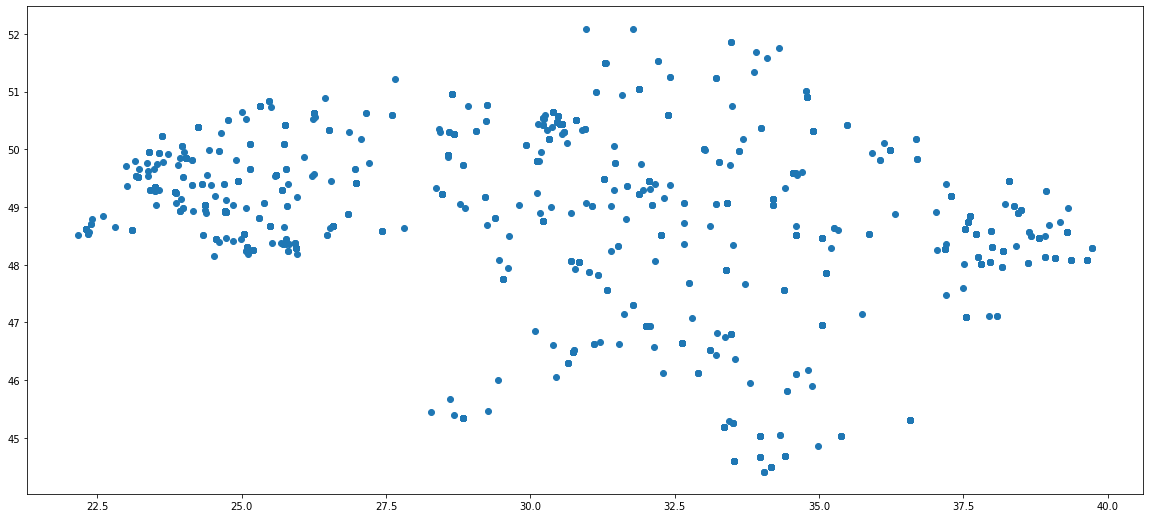

In [20]:
data_clean.plot(figsize=(20,10), )

In [21]:
country = geopandas.read_file("Ukraine.json")
country.head()

,@id,admin_level,boundary,iso3166-2,koatuu,name,name:ar,name:be,name:be-x-old,name:bg,...,name:bs,name:ur,name:gl,addr:country,is_in:country,name:yi,name:la,name:simple,name:uz,geometry
0,relation/91278,4,administrative,UA-71,7100000000,Черкаська область,محافظة تشيركاسي,Чаркаская вобласць,Чаркаская вобласьць,Черкаска област,...,None,None,None,None,None,None,None,None,None,"POLYGON ((32.07941 50.23724, 32.08917 50.23785..."
1,None,4,administrative,UA-74,7400000000,Чернігівська область,تشرنيهيف أوبلاست,Чарнігаўская вобласць,Чарнігаўская вобласьць,Черниговска област,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.29431 52.35727, 33.35895 52.35754..."
2,None,4,administrative,UA-77,7300000000,Чернівецька область,تشيرنيفتسي أوبلاست,Чарнавіцкая вобласць,Чарнавіцкая вобласьць,Черновицка област,...,None,None,None,None,None,None,None,None,None,"POLYGON ((25.74232 48.62970, 25.75334 48.63257..."
3,None,4,administrative,UA-43,0100000000,Автономна Республіка Крим,None,Аўтаномная Рэспубліка Крым,Аўтаномная Рэспубліка Крым,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((34.97755 45.76285, 35.04443 45.67004..."
4,None,4,administrative,UA-12,1200000000,Дніпропетровська область,دنيبروبتروفسك أوبلاست,Днепрапятроўская вобласць,Днепрапятроўская вобласьць,Днепропетровска област,...,None,None,None,None,None,None,None,None,None,"POLYGON ((34.98392 49.16370, 35.01840 49.15970..."


In [22]:
type(country.geometry[0])

shapely.geometry.polygon.Polygon

<AxesSubplot:>

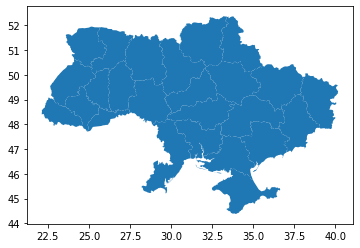

In [23]:
country.plot()

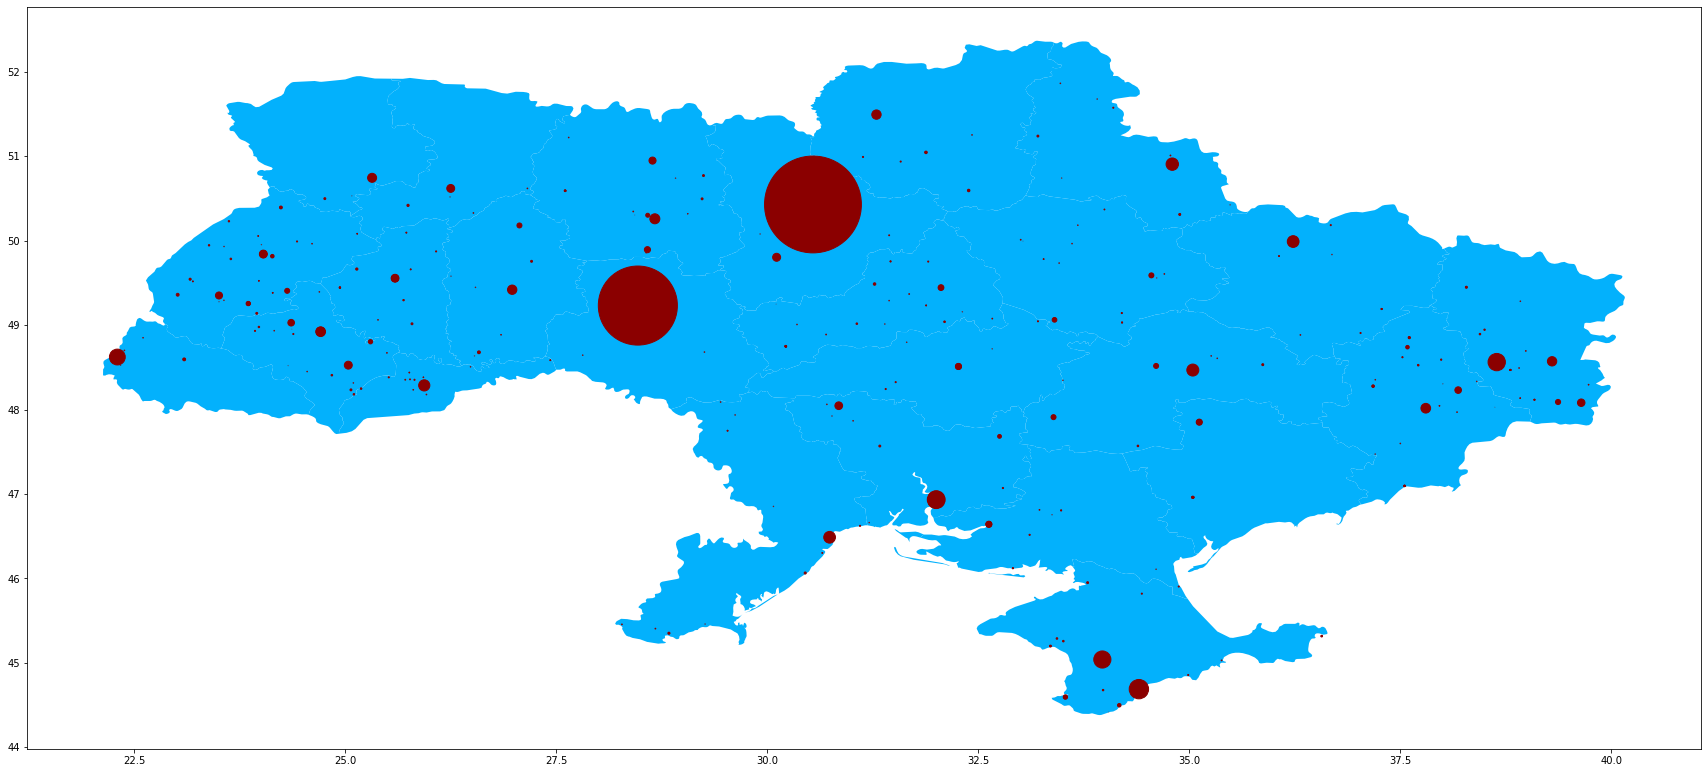

In [25]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country.plot(ax=ax, color='#03b1fc')

data_clean.plot(ax=base, color='darkred', marker=".", markersize=data_clean['Number of protesters']/20);